# Měření z termokamery

In [1]:
# nacteni knihoven
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data_folder = "./assets/"
ref_img_file = "R00006.BIN"
file_list = "FileList.txt"

test_img_file = "R00010.BIN"
pixel_precision = "16" #b, uint16
resolution = (768, 1024)
data_offset = 1149  #b
tempareture_table = 23  #*C
tempareture_black = 50

In [18]:
# nascteni hlavicky souboru jako textový soubor -> xml
def load_file(file, data_folder = "./assets/"):
    file = data_folder + file

    # nacteni binárního souboru
    with open(file, "rb") as f:
        data = f.read()

    # nacteni dat
    text = data[:data_offset].decode("utf-8")
    data = data[data_offset:]
    return text, data

text, data = load_file(test_img_file)
# print
print(text)


<?xml version="1.0" encoding="utf-8"?>
<ImageHeader type="IRH1">
	<HWinfo>
		<CameraID>IRm20C08</CameraID>
		<DNA>785423B61066623C</DNA>
		<Firmware>IRCA3Mv210222b</Firmware>
		<HWResolutionX>0000001032</HWResolutionX>
		<HWResolutionY>0000000768</HWResolutionY>
	</HWinfo>
	<statistics>
		<Minimum>0000000000</Minimum>
		<Maximum>0000016383</Maximum>
		<Sum>0000000008958569634</Sum>
		<ColoringMinimum>0000000000</ColoringMinimum>
		<ColoringMaximum>0000016383</ColoringMaximum>
		<FrameNumber>0000001759</FrameNumber>
		<TimeStamp>0000000065CC8964</TimeStamp>
		<TemperatureADCBol>0000035150</TemperatureADCBol>
	</statistics>
	<ImageParameters>
		<BitsPerPixel>0000000014</BitsPerPixel>
		<PixelByteStride>0000000002</PixelByteStride>
		<PixelBitStride>0000000016</PixelBitStride>
		<StartX>0000000004</StartX>
		<StartY>0000000000</StartY>
		<Width>0000001024</Width>
		<Height>0000000768</Height>
		<ByteSize>0001572864</ByteSize>
		<ImageFlags>00000001</ImageFlags>
	</ImageParameters>
	<Trigg

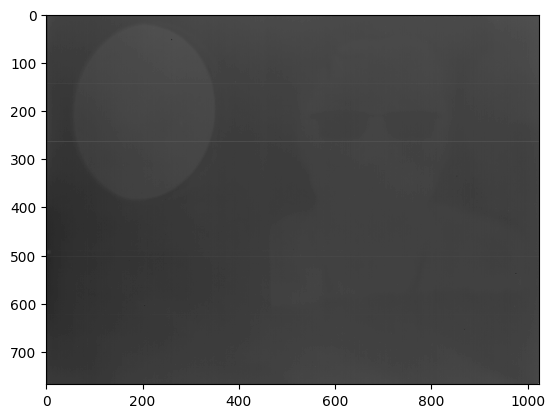

In [19]:
# konvert na numpy array
def convert_data(data, resolution, precision=16):
    if precision == 16:
        data = np.frombuffer(data, dtype=np.uint16)
    data = data.reshape(resolution)
    return data

data = convert_data(data, resolution)

# zobrazeni
plt.imshow(data, cmap="gray")

In [20]:
# nacteni obrazku
def load_images(file_list):
    with open(file_list, "r") as f:
        files = f.readlines()
    files = [f.strip() for f in files]
    return files

files = load_images(data_folder+file_list)
print(files)

['R00001.BIN', 'R00002.BIN', 'R00003.BIN', 'R00004.BIN', 'R00005.BIN', 'R00006.BIN', 'R00007.BIN', 'R00008.BIN', 'R00009.BIN', 'R00010.BIN', 'R00011.BIN', 'R00012.BIN']


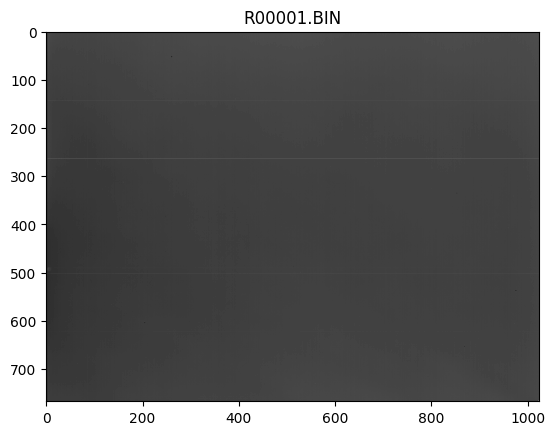

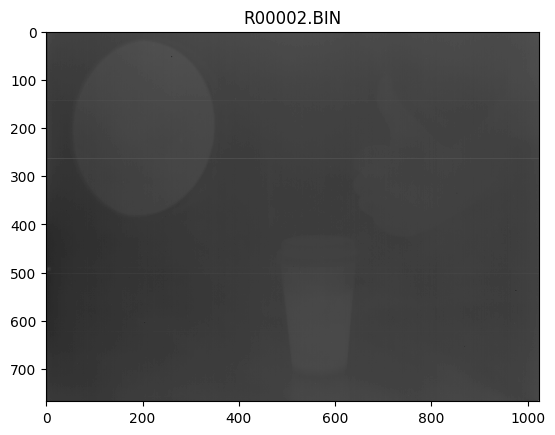

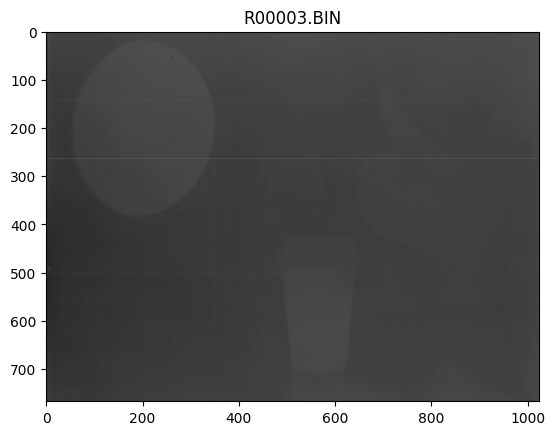

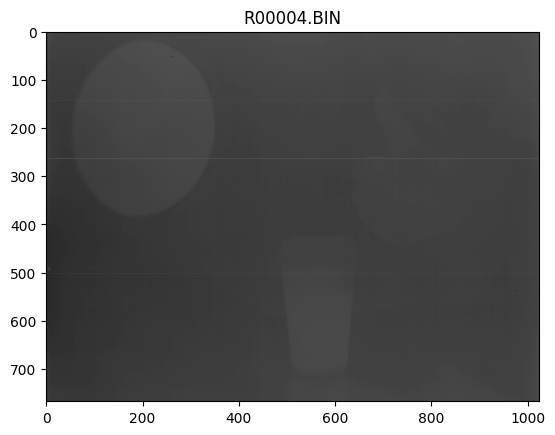

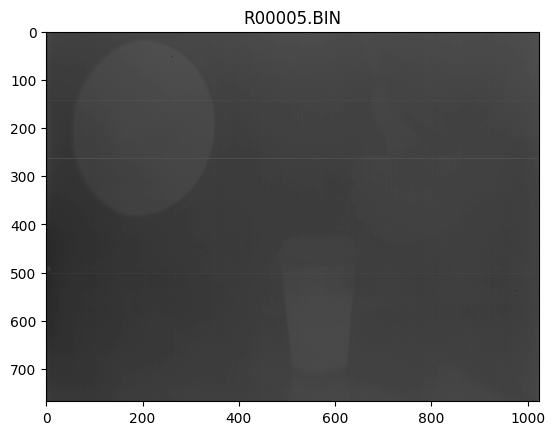

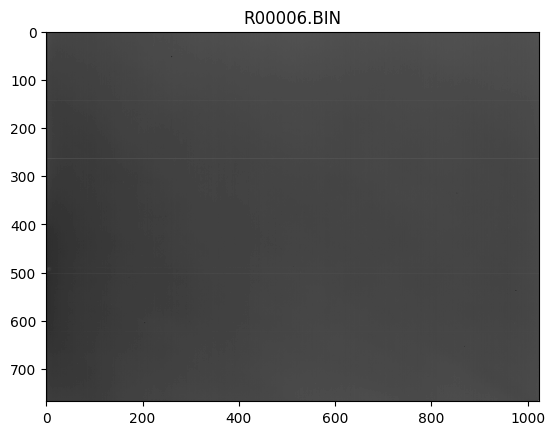

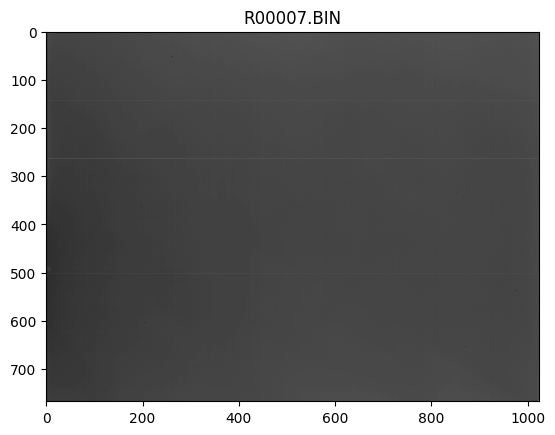

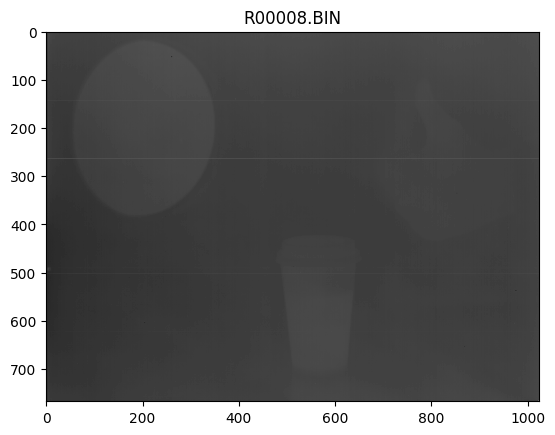

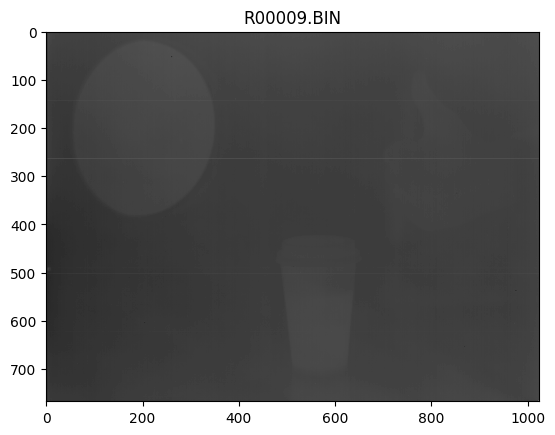

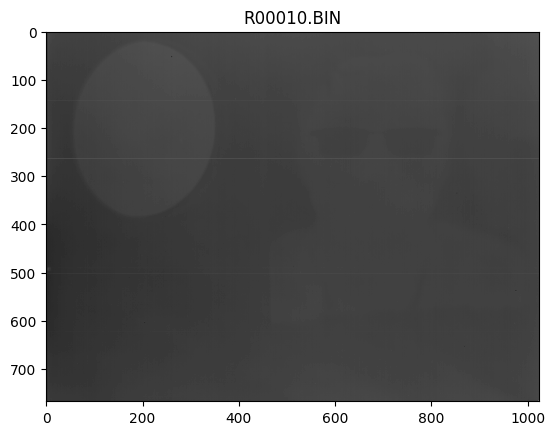

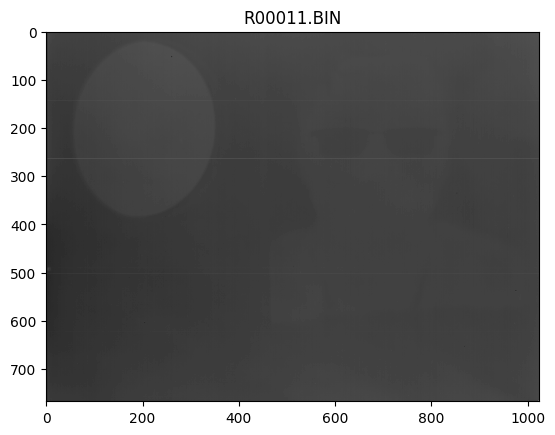

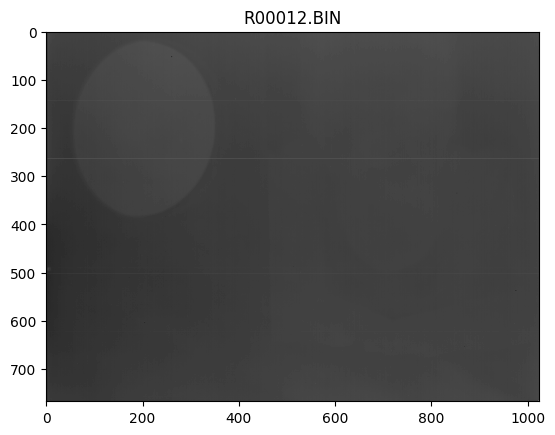

In [21]:
# print all images
for f in files:
    text, data = load_file(f)
    data = convert_data(data, resolution)
    plt.figure()
    plt.imshow(data, cmap="gray")
    plt.title(f)

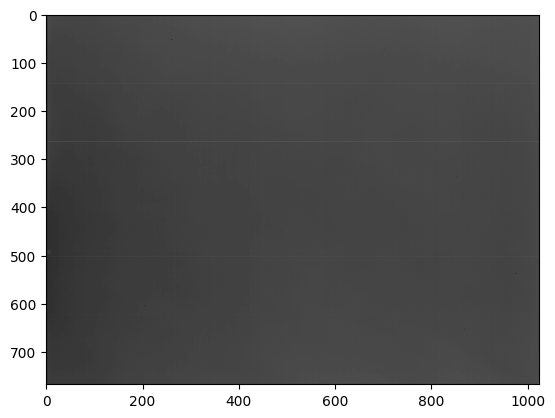

In [27]:
# nacteni referencniho obrazku
text, data = load_file(ref_img_file)
ref_data = convert_data(data, resolution)
plt.figure()
plt.imshow(ref_data, cmap="gray")

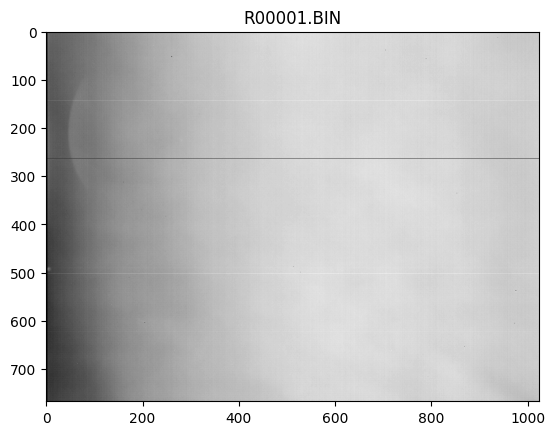

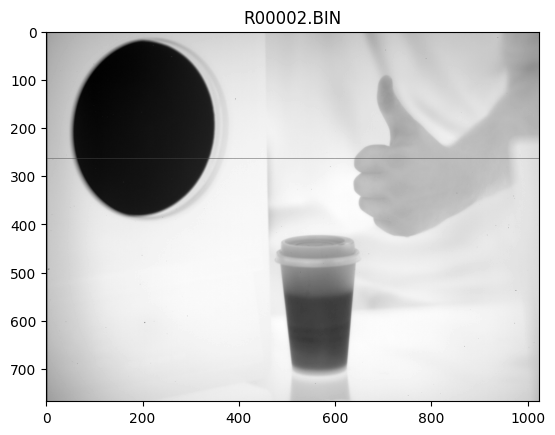

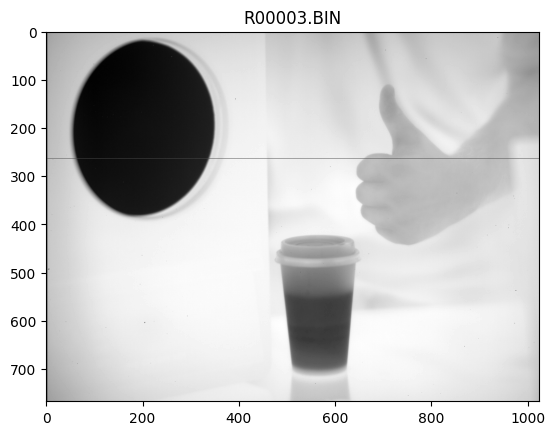

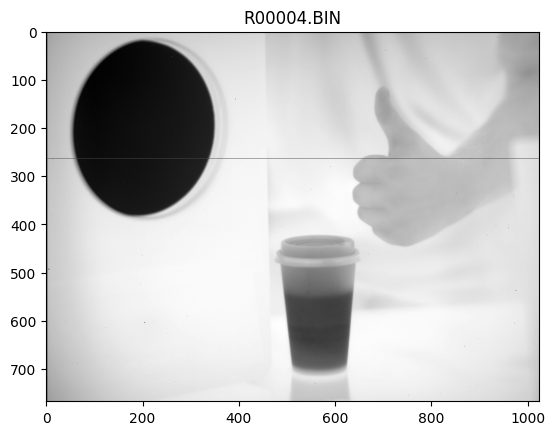

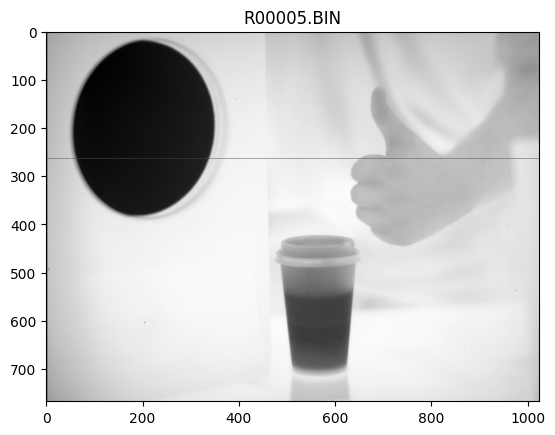

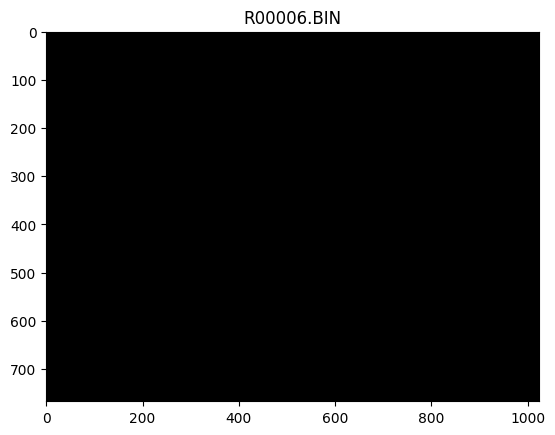

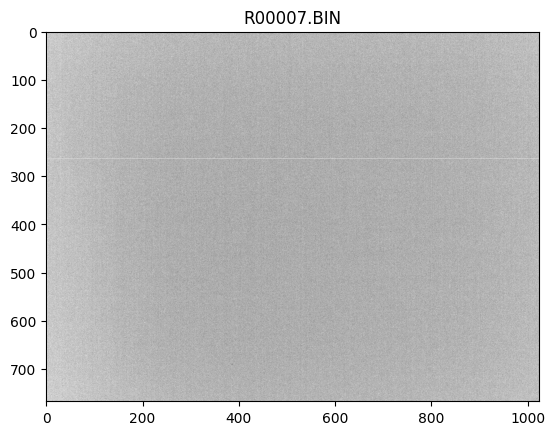

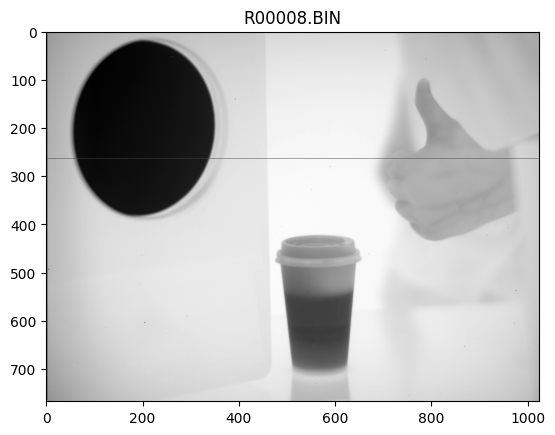

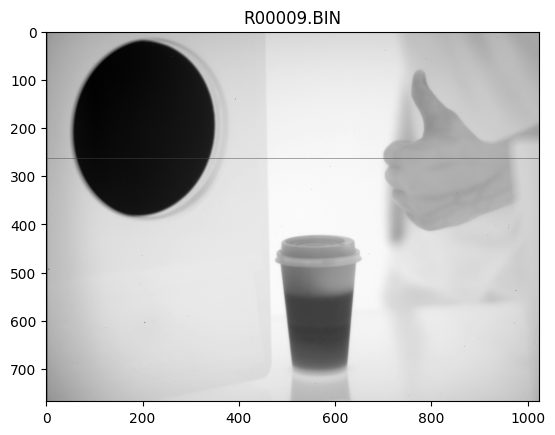

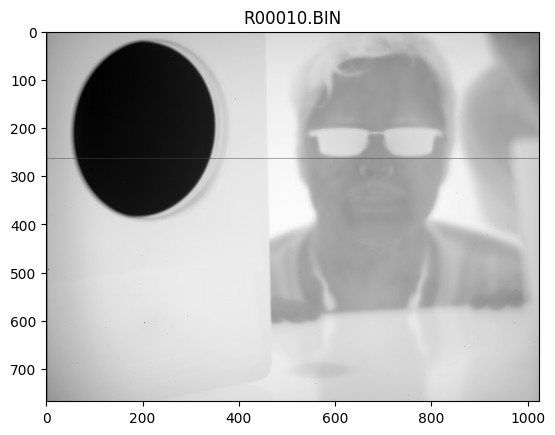

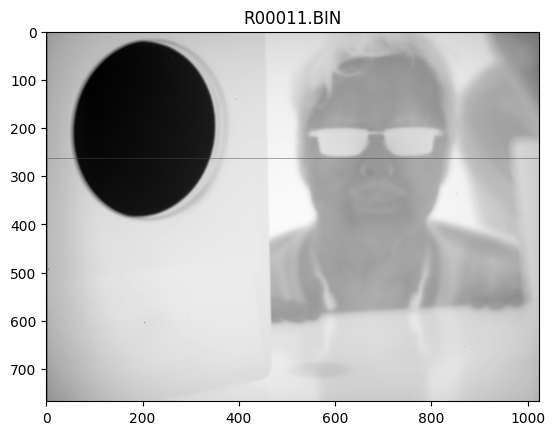

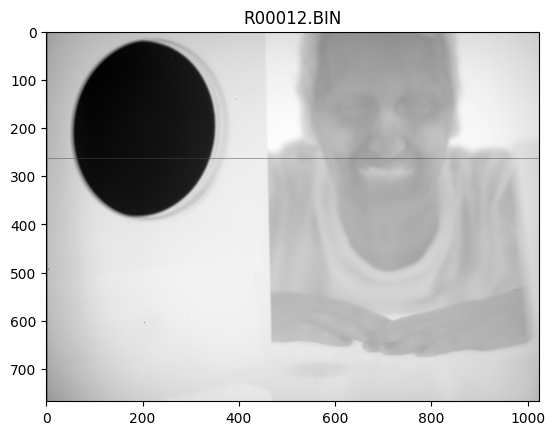

In [29]:
# odecteni referencniho obrazku od ostatnich
def subtract_images(ref_data, data):
    return data - ref_data

for f in files:
    text, data = load_file(f)
    data = convert_data(data, resolution)
    # convert to int
    data = data.astype(np.int32)
    ref_data = ref_data.astype(np.int32)
    data = subtract_images(data, ref_data)
    plt.figure()
    plt.imshow(data, cmap="gray")
    plt.title(f)

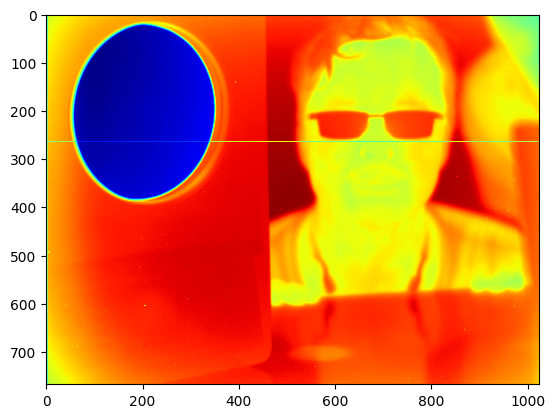

In [30]:
# test image
text, data = load_file(test_img_file)
data = convert_data(data, resolution)
data = data.astype(np.int32)
ref_data = ref_data.astype(np.int32)
data = subtract_images(data, ref_data)
plt.figure()
plt.imshow(data, cmap="jet")